In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd

In [5]:
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Function to load data from CSV
def load_data(file_path):
    return pd.read_csv(file_path)

# Load the data from local file path
file_path = r"C:\Users\Subham Ranjan\Downloads\copper_randomcsv.csv"
df2 = load_data(file_path)

# Create a dictionary to store the results
results = {}

# Store data information
results['data_info'] = pd.DataFrame({
    'Column': df2.columns,
    'Dtype': [str(df2[col].dtype) for col in df2.columns],
    'Non-Null Count': [df2[col].count() for col in df2.columns],
    'Null Count': [df2[col].isnull().sum() for col in df2.columns]
})

# Store first few rows
results['first_few_rows'] = df2.head()

# Store missing values
results['missing_values'] = df2.isnull().sum()

# Store data shape
results['data_shape'] = df2.shape

# Store column names
results['column_names'] = df2.columns.tolist()

# Store unique values for categorical columns
results['unique_values'] = {
    "Item Type": df2["item type"].unique(),
    "Country": df2["country"].unique(),
    "Status": df2["status"].unique(),
    "Application": df2["application"].unique()
}

# Store correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df2.corr(numeric_only=True), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
heatmap_fig = plt.gcf()  # Get the current figure
plt.close()
results['correlation_heatmap'] = heatmap_fig

# Store Point-Biserial Correlation Plot
binary_col = 'status'
if binary_col in df2.columns:
    df2[binary_col] = df2[binary_col].astype('category').cat.codes
    continuous_cols = df2.select_dtypes(include=['float64', 'int64']).columns

    if binary_col in continuous_cols:
        continuous_cols = continuous_cols.drop(binary_col)

    if not continuous_cols.empty:
        results_list = []
        for col in continuous_cols:
            point_biserial_corr, p_value = stats.pointbiserialr(df2[binary_col], df2[col])
            results_list.append((col, point_biserial_corr, p_value))

        results_df = pd.DataFrame(results_list, columns=['Variable', 'Point-Biserial Correlation', 'P-Value'])

        plt.figure(figsize=(10, 6))
        plt.barh(results_df['Variable'], results_df['Point-Biserial Correlation'], color='skyblue')
        plt.xlabel('Point-Biserial Correlation Coefficient')
        plt.title('Point-Biserial Correlation with Binary Variable')
        plt.axvline(0, color='grey', linestyle='--', linewidth=0.8)
        point_biserial_fig = plt.gcf()  # Get the current figure
        plt.close()
        results['point_biserial_correlation'] = point_biserial_fig
    else:
        results['point_biserial_correlation'] = "No continuous columns available for correlation calculation."
else:
    results['point_biserial_correlation'] = f"Binary column '{binary_col}' not found in the dataset."

# Store descriptive statistics
results['descriptive_statistics'] = df2.describe()

# Store box plot of continuous variables
plt.figure(figsize=(12, 6))
sns.boxplot(data=df2[['thickness', 'quantity tons', 'selling_price']], palette="Set2")
plt.title('Box Plot of Continuous Variables')
plt.xlabel('Variables')
plt.ylabel('Values')
box_plot_fig = plt.gcf()  # Get the current figure
plt.close()
results['box_plot'] = box_plot_fig

# Save the results to a pickle file
pickle_file_path = r"C:\Users\Subham Ranjan\Downloads\copper_analysis_results.pkl"
with open(pickle_file_path, 'wb') as f:
    pickle.dump(results, f)

print("Results have been pickled successfully.")


Results have been pickled successfully.


C:\Users\Subham Ranjan\AppData\Local\Temp\ipykernel_17180\1313897101.py:100: DeprecationWarning: Pickle, copy, and deepcopy support will be removed from itertools in Python 3.14.
  pickle.dump(results, f)


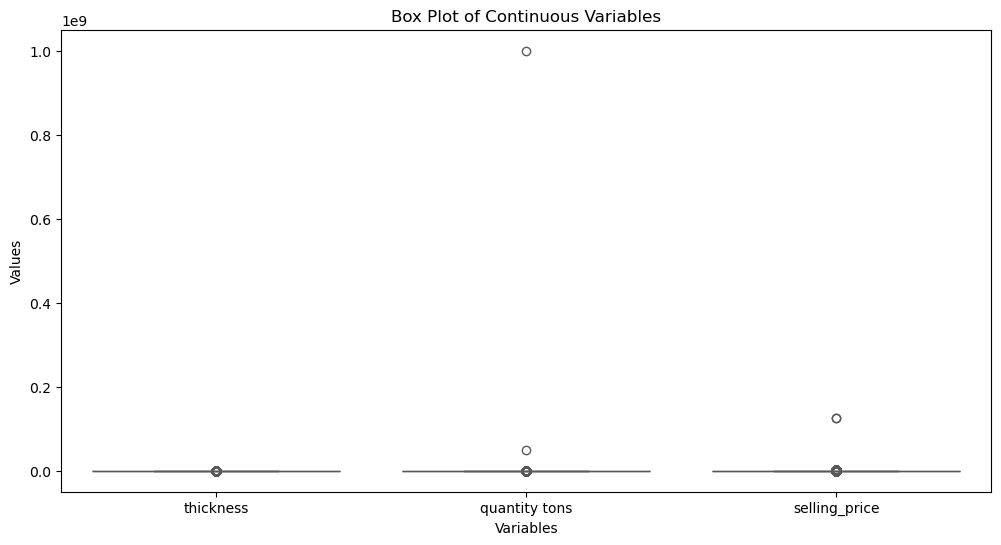

In [8]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df2[['thickness', 'quantity tons', 'selling_price']], palette="Set2")
plt.title('Box Plot of Continuous Variables')
plt.xlabel('Variables')
plt.ylabel('Values')
box_plot_fig = plt.gcf()  # Get the current figure
plt.close()
results['box_plot'] = box_plot_fig
box_plot_fig

In [2]:
# Read the CSV file into a pandas dataframe
df = pd.read_csv(r"C:\Users\Subham Ranjan\Downloads\Copper_2024 2_main.csv", encoding='latin1')
df.head()

,Unnamed: 0,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,selling_price
0,0,74B1B176-A388-4025-ACCF-F4E0E6B670F0,20230903.0,13.35927426,30161088.0,78.0,Won,W,10.0,2.0,1250.0,S235JR+AR EKO,1670798778,698.75
1,1,33D24C29-C735-4C8D-992F-5781023385CC,20230825.0,10.65265164,30198074.0,26.0,Not lost for AM,S,15.0,2.0,1500.0,0000000000000000000000000000000010106360,164337175,887.50
2,2,707698A9-9D4E-44F5-BAB7-A1B09638596F,20240205.0,7.357345475,30147722.0,78.0,To be approved,W,41.0,0.5,1240.0,NaN,611993,1707.50
3,3,6C6F75D2-CC38-493C-9AFE-E82C3F40E08C,20231210.0,41.25117295,30401985.0,27.0,Won,S,10.0,1.0,1000.0,DC01+ZE,1693867550,1061.25
4,4,7D6C9578-2E1F-4093-B2E6-D1010D60E857,20230826.0,24.20011388,30205312.0,32.0,Won,W,10.0,2.0,1500.0,NaN,1332077137,781.25


In [4]:
print(len(df['item_date'].unique())) #
print(len(df['customer'].unique())) #
print(len(df['material_ref'].unique()))
print(len(df['product_ref'].unique())) #

253
1170
16564
33


#### null values, shape and data types before dealing with incorrect data 

In [5]:
len(df["country"].unique())

18

In [6]:
# missing values
missing_values_count = df.isnull().sum()
print(missing_values_count)

Unnamed: 0           0
id                   2
item_date            1
quantity tons        0
customer             2
country             30
status               2
item type            0
application         24
thickness            1
width                0
material_ref     86253
product_ref          0
selling_price        1
dtype: int64


In [7]:
df["application"].unique()

array([10., 15., 41., 42., 38., 56., 59., 29., 27., 25., 40., 69., 20.,
       65., 28., 66., 22., 26., 79., 58., 39.,  3., 67., 68.,  4., 19.,
        5., 70., 99., nan,  2.])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201006 entries, 0 to 201005
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     201006 non-null  int64  
 1   id             201004 non-null  object 
 2   item_date      201005 non-null  float64
 3   quantity tons  201006 non-null  object 
 4   customer       201004 non-null  float64
 5   country        200976 non-null  float64
 6   status         201004 non-null  object 
 7   item type      201006 non-null  object 
 8   application    200982 non-null  float64
 9   thickness      201005 non-null  float64
 10  width          201006 non-null  float64
 11  material_ref   114753 non-null  object 
 12  product_ref    201006 non-null  int64  
 13  selling_price  201005 non-null  float64
dtypes: float64(7), int64(2), object(5)
memory usage: 21.5+ MB


### Dealing with data in wrong format

In [9]:
# dealing with data in wrong format
# for categorical variables, this step is ignored
# df = df[df['status'].isin(['Won', 'Lost'])]
df['item_date'] = pd.to_datetime(df['item_date'], format='%Y%m%d', errors='coerce').dt.date
df['quantity tons'] = pd.to_numeric(df['quantity tons'], errors='coerce')
df['customer'] = pd.to_numeric(df['customer'], errors='coerce')
df['country'] = pd.to_numeric(df['country'], errors='coerce')
df['application'] = pd.to_numeric(df['application'], errors='coerce')
df['thickness'] = pd.to_numeric(df['thickness'], errors='coerce')
df['width'] = pd.to_numeric(df['width'], errors='coerce')
df['material_ref'] = df['material_ref'].str.lstrip('0')
df['product_ref'] = pd.to_numeric(df['product_ref'], errors='coerce')
df['selling_price'] = pd.to_numeric(df['selling_price'], errors='coerce')


#### Nan values and shape after dealing with data in wrong format

In [10]:
missing_values_count = df.isnull().sum()
print(missing_values_count)
print(df.shape)
df.info()

Unnamed: 0           0
id                   2
item_date            4
quantity tons        1
customer             2
country             30
status               2
item type            0
application         24
thickness            1
width                0
material_ref     86253
product_ref          0
selling_price        1
dtype: int64
(201006, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201006 entries, 0 to 201005
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     201006 non-null  int64  
 1   id             201004 non-null  object 
 2   item_date      201002 non-null  object 
 3   quantity tons  201005 non-null  float64
 4   customer       201004 non-null  float64
 5   country        200976 non-null  float64
 6   status         201004 non-null  object 
 7   item type      201006 non-null  object 
 8   application    200982 non-null  float64
 9   thickness      201005 non-null  float64
 

### Dealing with Missing Values

In [11]:
# material_ref has large set of null values, so replacing them with unknown 
# deleting the remaining null values as they are less than 1% of data which can be neglected
df = df.drop("material_ref",axis = 1)

In [12]:
missing_values_count = df.isnull().sum()
print(missing_values_count)
print(df.shape)

Unnamed: 0        0
id                2
item_date         4
quantity tons     1
customer          2
country          30
status            2
item type         0
application      24
thickness         1
width             0
product_ref       0
selling_price     1
dtype: int64
(201006, 13)


In [13]:
g = [10,15,41,42,38,56,59,29,27,25,40,69,20,65,28,66,22,26,79,58,39,3,67,68,4,19,5,70,99,2]
len(g)

30

In [14]:
df_p=df.copy()

PLOTTING

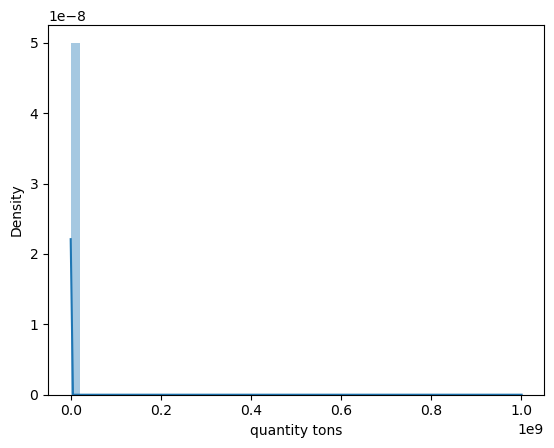

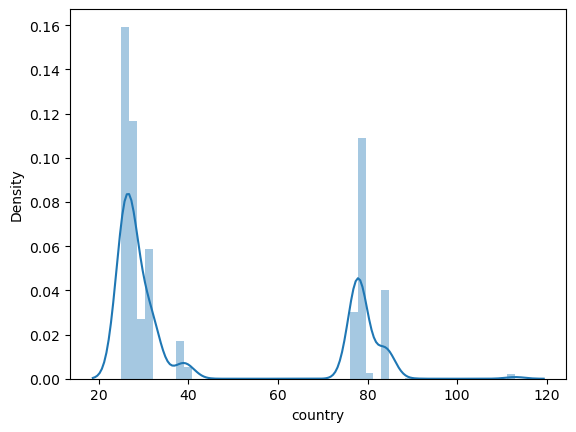

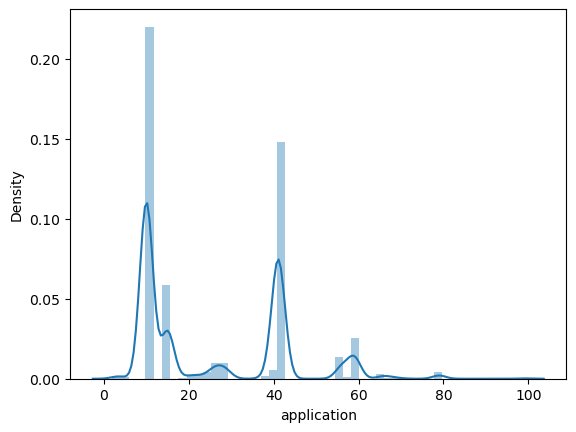

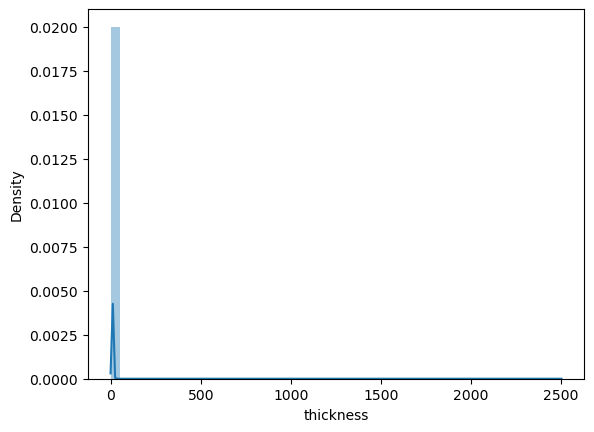

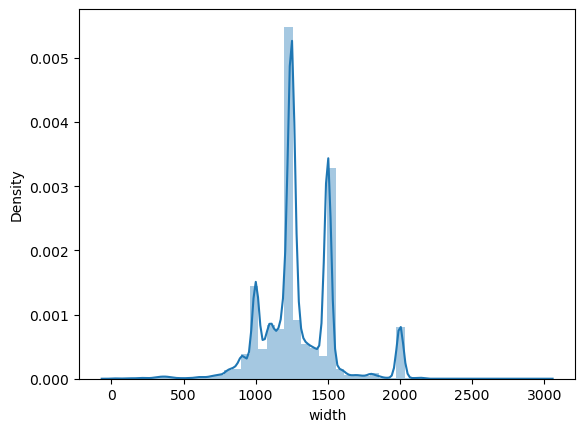

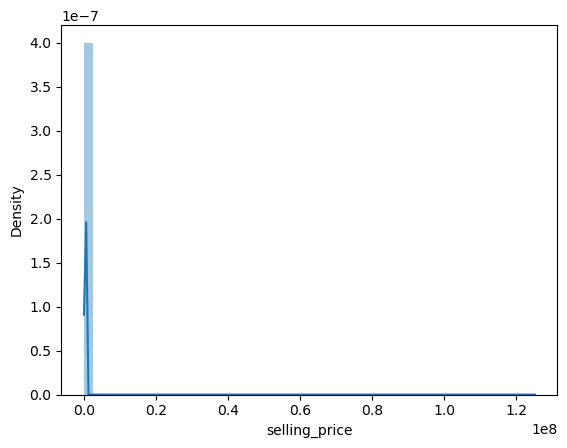

In [15]:
# ['quantity tons','selling_price','application','thickness','width', 'country']
# ['status','item type']

df_p['quantity tons']   # skewed
df_p['country']
df_p['application']
df_p['thickness']       # skewed
df_p['width']           
df_p['selling_price']   # skewed

import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(df_p['quantity tons'])
plt.show()
sns.distplot(df_p['country'])
plt.show()
sns.distplot(df_p['application'])
plt.show()
sns.distplot(df_p['thickness'])
plt.show()
sns.distplot(df_p['width'])
plt.show()
sns.distplot(df_p['selling_price'])
plt.show()


In [19]:
import numpy as np
mask1 = df_p['selling_price'] <= 0
print(mask1.sum())
df_p.loc[mask1, 'selling_price'] = np.nan

mask1 = df_p['quantity tons'] <= 0
print(mask1.sum())
df_p.loc[mask1, 'quantity tons'] = np.nan

mask1 = df_p['thickness'] <= 0
print(mask1.sum())


0
0
0


In [20]:
df_p.isnull().sum()

Unnamed: 0        0
id                2
item_date         4
quantity tons     5
customer          2
country          30
status            2
item type         0
application      24
thickness         1
width             0
product_ref       0
selling_price     8
dtype: int64

In [18]:
df_p

,Unnamed: 0,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price
0,0,74B1B176-A388-4025-ACCF-F4E0E6B670F0,2023-09-03,13.359274,30161088.0,78.0,Won,W,10.0,2.00,1250.0,1670798778,698.75000
1,1,33D24C29-C735-4C8D-992F-5781023385CC,2023-08-25,10.652652,30198074.0,26.0,Not lost for AM,S,15.0,2.00,1500.0,164337175,887.50000
2,2,707698A9-9D4E-44F5-BAB7-A1B09638596F,2024-02-05,7.357345,30147722.0,78.0,To be approved,W,41.0,0.50,1240.0,611993,1707.50000
3,3,6C6F75D2-CC38-493C-9AFE-E82C3F40E08C,2023-12-10,41.251173,30401985.0,27.0,Won,S,10.0,1.00,1000.0,1693867550,1061.25000
4,4,7D6C9578-2E1F-4093-B2E6-D1010D60E857,2023-08-26,24.200114,30205312.0,32.0,Won,W,10.0,2.00,1500.0,1332077137,781.25000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
201001,201001,27380BD7-CD26-4CA7-A14E-945AF12F9F36,2024-01-22,27.432895,30267349.0,84.0,Not lost for AM,S,10.0,2.00,1410.0,1668701718,1172.53750
201002,201002,C9530723-60F7-433C-A673-BC522FE98BB5,2023-10-05,154.952880,30344219.0,32.0,Won,PL,10.0,0.80,1040.0,628377,788.75000
201003,201003,AZ754C40-CB04-4B1F-91C9-86013391EC64,2023-09-11,0.000921,30196886.0,84.0,Unknown,S,10.0,4.43,1202.0,1670798778,217553.25986
201004,201004,12DCDBB5-1B0E-4DF3-A014-9E4EDEAD13A7,2023-12-18,7.347223,30157111.0,78.0,Won,W,41.0,1.40,1400.0,164141591,1093.75000


In [21]:
df_p.dropna(inplace=True)


In [22]:
df_p.isnull().sum()

Unnamed: 0       0
id               0
item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
selling_price    0
dtype: int64

In [24]:
df_p.to_excel("copper_random.xlsx", index=False, engine='openpyxl')

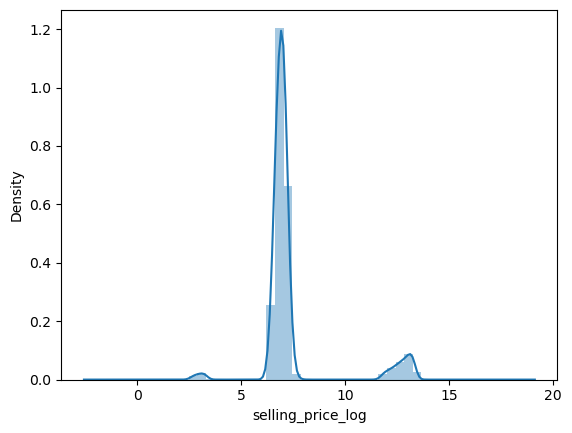

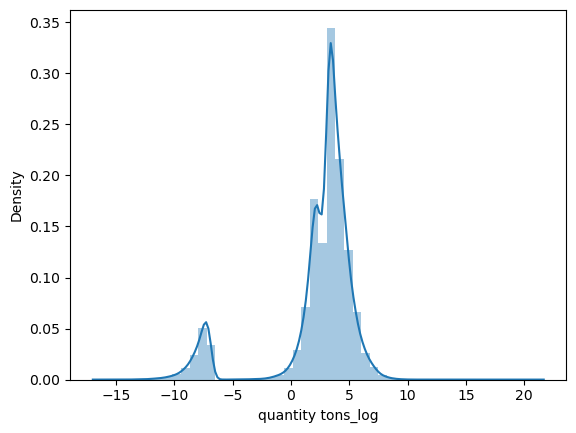

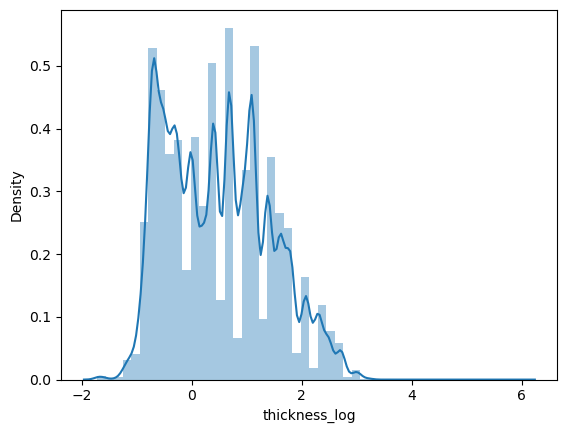

In [25]:
import numpy as np
df_p['selling_price_log'] = np.log(df_p['selling_price'])
sns.distplot(df_p['selling_price_log'])
plt.show()

df_p['quantity tons_log'] = np.log(df_p['quantity tons'])
sns.distplot(df_p['quantity tons_log'])
plt.show()

df_p['thickness_log'] = np.log(df_p['thickness'])
sns.distplot(df_p['thickness_log'])
plt.show()
# reverts log
# df_p['revertes'd_value] = np.exp(df_p['selling_price_log'])
# sns.distplot(df_p['reverted_values'])
# plt.show()

<Axes: xlabel='selling_price_log'>

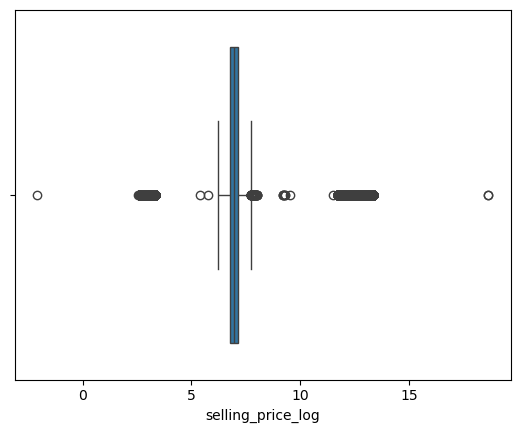

In [26]:
sns.boxplot(data  =df_p,x = "selling_price_log")

In [27]:
df_p.head()

,Unnamed: 0,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price,selling_price_log,quantity tons_log,thickness_log
0,0,74B1B176-A388-4025-ACCF-F4E0E6B670F0,2023-09-03,13.359274,30161088.0,78.0,Won,W,10.0,2.0,1250.0,1670798778,698.75,6.549293,2.592211,0.693147
1,1,33D24C29-C735-4C8D-992F-5781023385CC,2023-08-25,10.652652,30198074.0,26.0,Not lost for AM,S,15.0,2.0,1500.0,164337175,887.50,6.788409,2.365809,0.693147
2,2,707698A9-9D4E-44F5-BAB7-A1B09638596F,2024-02-05,7.357345,30147722.0,78.0,To be approved,W,41.0,0.5,1240.0,611993,1707.50,7.442786,1.995699,-0.693147
3,3,6C6F75D2-CC38-493C-9AFE-E82C3F40E08C,2023-12-10,41.251173,30401985.0,27.0,Won,S,10.0,1.0,1000.0,1693867550,1061.25,6.967203,3.719680,0.000000
4,4,7D6C9578-2E1F-4093-B2E6-D1010D60E857,2023-08-26,24.200114,30205312.0,32.0,Won,W,10.0,2.0,1500.0,1332077137,781.25,6.660895,3.186357,0.693147


In [38]:
x=df_p[['quantity tons_log','application','thickness_log','width','selling_price_log','country','customer','product_ref']].corr()

In [39]:
#df.to_csv("cleaned_cu",index = False)

<Axes: >

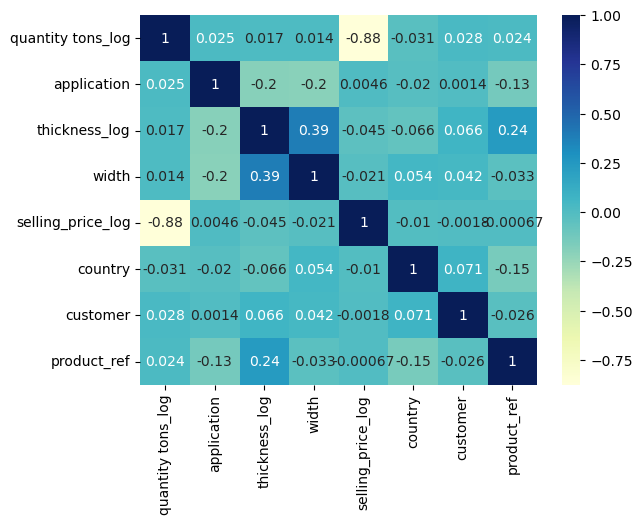

In [40]:
sns.heatmap(x, annot=True, cmap="YlGnBu")

## DECISION TREE REGRESSOR 

   #### 1 Encode categorical features
   #### 2 Test and Train split
   #### 3 Define Hyperparameters for GridSearchCV
   #### 4 Train the DecisionTreeRegressor with best parameters
   #### 5 Evalution metrics
   #### 6 Predict the selling price for new values
   #### 7 Save the DecisionTreeRegressor model

In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

X=df_p[['quantity tons_log','item type','application','thickness_log','width','country','customer','product_ref']]
y=df_p['selling_price_log']
# encoding categorical variables
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(X[['item type']])
X_ohe = ohe.fit_transform(X[['item type']]).toarray()

# independent features after encoding
X = np.concatenate((X[['quantity tons_log', 'application', 'thickness_log', 'width','country','customer','product_ref']].values, X_ohe), axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)
# test and train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# decision tree 
dtr = DecisionTreeRegressor()
# hyperparameters
param_grid = {'max_depth': [2, 5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['auto', 'sqrt', 'log2']}
# gridsearchcv
grid_search = GridSearchCV(estimator=dtr, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
# evalution metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean squared error:', mse)
print('R-squared:', r2)


Best hyperparameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5}
Mean squared error: 0.24285748752489933
R-squared: 0.9272718430392993


In [42]:
y_pred_train = best_model.predict(X_train)
rm_train = r2_score(y_train, y_pred_train)
print('R-squared on training data:', rm_train)


R-squared on training data: 0.9647271030273494


In [43]:
y_pred_test = best_model.predict(X_test)
rm_test = r2_score(y_test, y_pred_test)
print('R-squared on test data:', rm_test)


R-squared on test data: 0.9272718430392993


In [44]:
from sklearn.metrics import r2_score

# Assuming best_model is already trained
y_pred_train = best_model.predict(X_train)

# Calculate R-squared on training data
rm_train = r2_score(y_train, y_pred_train)
print('R-squared on training data:', rm_train)


R-squared on training data: 0.9647271030273494


In [45]:
import numpy as np

# Example new sample data
new_sample = np.array([[np.log(40), 'PL', 10, np.log(250), 0, 28, 30202938, 1670798778 ]])

# Assuming 'PL' and 'Won' are your categorical variables
new_sample_ohe = ohe.transform(new_sample[:, [1]]).toarray()  # Encode 'PL'

# Concatenate numerical features with encoded categorical features
new_sample = np.concatenate((new_sample[:, [0, 2, 3, 4, 5, 6, 7]], new_sample_ohe), axis=1)

# Scale the new sample using the previously fitted scaler
new_sample1 = scaler.transform(new_sample)

# Predict using the best model obtained from GridSearchCV
new_pred = best_model.predict(new_sample1)

# Print the predicted selling price
print('Predicted selling price:', np.exp(new_pred))


Predicted selling price: [1015.]


In [29]:
ohe2 = OneHotEncoder(handle_unknown='ignore')
ohe2.fit(df[['status']])

OneHotEncoder(handle_unknown='ignore')

In [30]:
# Saving the model
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(best_model, file)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('t.pkl', 'wb') as f:
    pickle.dump(ohe, f)
with open('s.pkl', 'wb') as f:
    pickle.dump(ohe2, f)

In [31]:
print(len(df_p))
df_p.head(3)

200952


,Unnamed: 0,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price,selling_price_log,quantity tons_log,thickness_log
0,0,74B1B176-A388-4025-ACCF-F4E0E6B670F0,2023-09-03,13.359274,30161088.0,78.0,Won,W,10.0,2.0,1250.0,1670798778,698.75,6.549293,2.592211,0.693147
1,1,33D24C29-C735-4C8D-992F-5781023385CC,2023-08-25,10.652652,30198074.0,26.0,Not lost for AM,S,15.0,2.0,1500.0,164337175,887.50,6.788409,2.365809,0.693147
2,2,707698A9-9D4E-44F5-BAB7-A1B09638596F,2024-02-05,7.357345,30147722.0,78.0,To be approved,W,41.0,0.5,1240.0,611993,1707.50,7.442786,1.995699,-0.693147


In [32]:
df_c = df_p[df_p['status'].isin(['Won', 'Lost'])]
len(df_c)

150429

## DECISION TREE CLASSIFIER

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelBinarizer

Y = df_c['status']
X= df_c[['quantity tons_log','item type','application','thickness_log','width','country','customer','product_ref']]

# encoding categorical variables
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(X[['item type']])
X_ohe = ohe.fit_transform(X[['item type']]).toarray()
be = LabelBinarizer()
be.fit(Y) 
y = be.fit_transform(Y)
# independent features after encoding
X = np.concatenate((X[['quantity tons_log','application','thickness_log', 'width','country','customer','product_ref']].values, X_ohe), axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# decision tree classifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")


Accuracy: 0.8925746194243169
Confusion Matrix:
[[ 5151  1612]
 [ 1620 21703]]


Confusion Matrix:
[[ 5159  1604]
 [ 1660 21663]]
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.76      0.76      6763
           1       0.93      0.93      0.93     23323

    accuracy                           0.89     30086
   macro avg       0.84      0.85      0.84     30086
weighted avg       0.89      0.89      0.89     30086



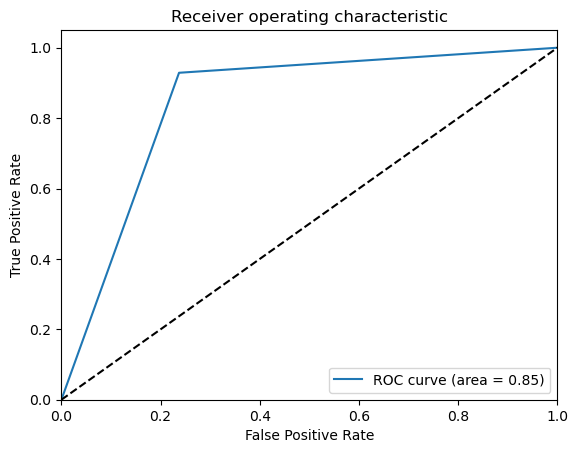

In [33]:
# Evalution Metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
# ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


In [34]:
import numpy as np

# Assuming `ohe`, `scaler`, and `dtc` are already defined as in your previous code

# Define your input sample
new_sample = np.array([[np.log(700), 'W', 10, np.log(2), 1500, 28.0, 30202938, 1670798778]])

# Encoding categorical variable 'item type'
new_sample_ohe = ohe.transform(new_sample[:, [1]]).toarray()

# Concatenate numerical and encoded categorical features
new_sample_encoded = np.concatenate((new_sample[:, [0, 2, 3, 4, 5, 6, 7]], new_sample_ohe), axis=1)

# Scale the input sample using the same scaler
new_sample_scaled = scaler.transform(new_sample_encoded)

# Make predictions using the Decision Tree Classifier
new_pred = dtc.predict(new_sample_scaled)

# Interpret the prediction
if new_pred == 1:
    print('The status is: Won')
else:
    print('The status is: Lost')


The status is: Lost


In [35]:
# Saving the model
import pickle
with open('cmodel.pkl', 'wb') as file:
    pickle.dump(dtc, file)
with open('cscaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('ct.pkl', 'wb') as f:
    pickle.dump(ohe, f)

In [36]:
numeric_columns = df_p.select_dtypes(include=[np.number]).columns

# Calculate minimum and maximum values for numeric columns
min_values = df_p[numeric_columns].min()
max_values = df_p[numeric_columns].max()

# Print column names along with their minimum and maximum values
print("Numeric column-wise minimum and maximum values:")
for col in numeric_columns:
    print(f"{col}: Min = {min_values[col]}, Max = {max_values[col]}")

Numeric column-wise minimum and maximum values:
Unnamed: 0: Min = 0.0, Max = 201005.0
quantity tons: Min = 1.0904939053257845e-07, Max = 1000000000.0
customer: Min = 12458.0, Max = 30408185.0
country: Min = 25.0, Max = 113.0
application: Min = 2.0, Max = 99.0
thickness: Min = 0.18, Max = 400.0
width: Min = 1.0, Max = 2990.0
product_ref: Min = 611728.0, Max = 1722207579.0
selling_price: Min = 0.125, Max = 125001268.75
selling_price_log: Min = -2.0794415416798357, Max = 18.643834445215063
quantity tons_log: Min = -16.03146493319492, Max = 20.72326583694641
thickness_log: Min = -1.7147984280919266, Max = 5.991464547107982


In [37]:
df_p[df_p["quantity tons"]<0]

,Unnamed: 0,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price,selling_price_log,quantity tons_log,thickness_log


In [38]:
df_p

,Unnamed: 0,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price,selling_price_log,quantity tons_log,thickness_log
0,0,74B1B176-A388-4025-ACCF-F4E0E6B670F0,2023-09-03,13.359274,30161088.0,78.0,Won,W,10.0,2.00,1250.0,1670798778,698.75000,6.549293,2.592211,0.693147
1,1,33D24C29-C735-4C8D-992F-5781023385CC,2023-08-25,10.652652,30198074.0,26.0,Not lost for AM,S,15.0,2.00,1500.0,164337175,887.50000,6.788409,2.365809,0.693147
2,2,707698A9-9D4E-44F5-BAB7-A1B09638596F,2024-02-05,7.357345,30147722.0,78.0,To be approved,W,41.0,0.50,1240.0,611993,1707.50000,7.442786,1.995699,-0.693147
3,3,6C6F75D2-CC38-493C-9AFE-E82C3F40E08C,2023-12-10,41.251173,30401985.0,27.0,Won,S,10.0,1.00,1000.0,1693867550,1061.25000,6.967203,3.719680,0.000000
4,4,7D6C9578-2E1F-4093-B2E6-D1010D60E857,2023-08-26,24.200114,30205312.0,32.0,Won,W,10.0,2.00,1500.0,1332077137,781.25000,6.660895,3.186357,0.693147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201001,201001,27380BD7-CD26-4CA7-A14E-945AF12F9F36,2024-01-22,27.432895,30267349.0,84.0,Not lost for AM,S,10.0,2.00,1410.0,1668701718,1172.53750,7.066925,3.311743,0.693147
201002,201002,C9530723-60F7-433C-A673-BC522FE98BB5,2023-10-05,154.952880,30344219.0,32.0,Won,PL,10.0,0.80,1040.0,628377,788.75000,6.670449,5.043121,-0.223144
201003,201003,AZ754C40-CB04-4B1F-91C9-86013391EC64,2023-09-11,0.000921,30196886.0,84.0,Unknown,S,10.0,4.43,1202.0,1670798778,217553.25986,12.290199,-6.990044,1.488400
201004,201004,12DCDBB5-1B0E-4DF3-A014-9E4EDEAD13A7,2023-12-18,7.347223,30157111.0,78.0,Won,W,41.0,1.40,1400.0,164141591,1093.75000,6.997367,1.994322,0.336472


In [39]:
import pyodbc
import pickle

# Connection parameters
server = r'SUBHAMRANJAN\SQLEXPRESS'
database = 'namsql'
connection_string = fr'DRIVER={{SQL Server}};SERVER={server};DATABASE={database};Trusted_Connection=yes;'

def fetch_data(query):
    try:
        # Establish a connection to the SQL Server
        conn = pyodbc.connect(connection_string)
        cursor = conn.cursor()
        cursor.execute(query)
        data = cursor.fetchall()
        conn.close()
        return data
    except Exception as e:
        print(f"Error: {e}")
        return None

# Example query
query = "SELECT TOP 5 selling_price FROM Copper"

# Fetch data
data = fetch_data(query)

for item in data:
    print(item)

(1235.0,)
(1025.0,)
(993.75,)
(1210.0,)
(842.5,)


In [40]:
import pyodbc

# Connection parameters
server = r'SUBHAMRANJAN\SQLEXPRESS'  # raw string literal
database = 'namsql'  # Database name

try:
    # Establish a connection to the SQL Server
    conn = pyodbc.connect(fr'DRIVER={{SQL Server}};SERVER={server};DATABASE={database};Trusted_Connection=yes;')

    # Create a cursor object
    cursor = conn.cursor()

    # Query to fetch orders
    query = '''
        SELECT top 5 order_id, order_date, DATEPART(YEAR, order_date) AS year
        FROM orders
    '''

    # Execute the query
    cursor.execute(query)

    # Fetch the results
    results = cursor.fetchall()

    # Print each row
    for row in results:
        print(row)

    # Close cursor and connection (optional)
    

except Exception as e:
    print(f"Error: {str(e)}")


('CA-2020-149797', datetime.datetime(2020, 9, 15, 0, 0), 2020)
('CA-2018-132962', datetime.datetime(2018, 9, 13, 0, 0), 2018)
('CA-2018-132962', datetime.datetime(2018, 9, 13, 0, 0), 2018)
('CA-2019-115091', datetime.datetime(2019, 10, 5, 0, 0), 2019)
('CA-2019-115091', datetime.datetime(2019, 10, 5, 0, 0), 2019)


In [41]:
query = """       
SELECT item_type, MAX(quantity_tons) AS max_quantity_tons
FROM Copper
GROUP BY item_type;
"""

    # Execute the query
cursor.execute(query)

    # Fetch the results
results = cursor.fetchall()

    # Print each row
for row in results:
    print(row)

('WI', 136.2583019015)
('IPL', 10.70303073)
('Others', 136.2583019015)
('W', 136.2583019015)
('S', 136.2583019015)
('PL', 136.2583019015)


In [42]:
# For which application, the average order quantity is the highest and the lowest?

query = '''
       with cte as(
select application,avg(quantity_tons) as avg_qty from Copper group by application),
app_qty as(
select *,dense_rank() over(order by avg_qty desc) as h_rn,dense_rank() over(order by avg_qty) as l_rn from cte)
select application,round(avg_qty,0) as avg_qty from app_qty where h_rn = 1 or l_rn = 1 order by avg_qty desc;
    '''

    # Execute the query
cursor.execute(query)

    # Fetch the results
results = cursor.fetchall()

    # Print each row
for row in results:
    print(row)

(58.0, 103.0)
(2.0, 18.0)


In [43]:
# Which item type has the max number of ‘Win’ status?
query = """
       
select item_type,count(status) as win_cnt from Copper where status = 'Won'
group by item_type order by count(status) desc"""

    # Execute the query
cursor.execute(query)

    # Fetch the results
results = cursor.fetchall()

    # Print each row
for row in results:
    print(row)

('W', 52114)
('S', 17698)
('PL', 3990)
('WI', 465)
('Others', 433)
('IPL', 27)


In [44]:
query = """
DECLARE @N INT = 2;

    WITH RevenueRankings AS (
    SELECT 
        customer,
        id AS order_id,
        ROUND(SUM(selling_price), 0) AS revenue,
        ROW_NUMBER() OVER (ORDER BY SUM(selling_price) DESC) AS TopRank,
        ROW_NUMBER() OVER (ORDER BY SUM(selling_price) ASC) AS BottomRank
    FROM Copper GROUP BY customer, id)
SELECT customer,order_id,revenue,'Top' AS RankType FROM RevenueRankings WHERE TopRank <= @N
UNION ALL
SELECT customer,order_id,revenue,'Bottom' AS RankType FROM RevenueRankings WHERE BottomRank <= @N
ORDER BY RankType, revenue DESC"""

    # Execute the query
cursor.execute(query)

    # Fetch the results
results = cursor.fetchall()

    # Print each row
for row in results:
    print(row)

(30332305.0, '0027E2B2-CCFA-4C8B-8BDE-88CF0E218AA9', 238.0, 'Bottom')
(30268696.0, '003A0EA7-943C-42FE-842A-FA3E3EFC7010', 238.0, 'Bottom')
(30205658.0, 'AZB62711-5355-474C-82B5-B6BE43D0EE10', 7533.0, 'Top')
(30299929.0, 'AZBD2DF5-A64F-4361-BCC6-A6C5825C138D', 7533.0, 'Top')


In [45]:
##Country-wise sum of sales.

query = """
       
select country,round(sum(selling_price),0) as sales from Copper group by country order by sum(selling_price) desc"""

    # Execute the query
cursor.execute(query)

    # Fetch the results
results = cursor.fetchall()

    # Print each row
for row in results:
    print(row)

(78.0, 24475232.0)
(25.0, 19797279.0)
(26.0, 15574337.0)
(27.0, 14873260.0)
(32.0, 14467796.0)
(28.0, 13611062.0)
(84.0, 8402573.0)
(30.0, 6837177.0)
(77.0, 6239549.0)
(38.0, 375167.0)
(80.0, 353583.0)
(79.0, 299754.0)
(113.0, 223304.0)
(39.0, 190646.0)
(40.0, 145660.0)
(107.0, 3270.0)


In [46]:
import pandas as pd
The maximum valid quantity-tons ordered in each item-type category.
b) For which application, the average order quantity is the highest and the lowest?
c) Which item type has the max number of ‘Win’ status?
d) N number of customers who are top and bottom contributors in Revenue. User should have an option to choose the value of n. Return order_id and customer_id
e) Country-wise sum of sales.

SyntaxError: unmatched ')' (2709779465.py, line 5)

In [ ]:

# Function to execute a query and save the results to a .pkl file
def execute_and_save_query(query, file_name):
    cursor.execute(query)
    results = cursor.fetchall()
    columns = [column[0] for column in cursor.description]
    df = pd.DataFrame.from_records(results, columns=columns)
    with open(file_name, 'wb') as file:
        pickle.dump(df, file)
    print(f"Data saved to {file_name}")

#The maximum valid quantity-tons ordered in each item-type category.
query = """
    SELECT item_type, MAX(quantity_tons) AS max_quantity_tons
FROM Copper
GROUP BY item_type;

"""
execute_and_save_query(query, 'country_sales.pkl')

# 2. b) For which application, the average order quantity is the highest and the lowest?

query = """
      with cte as(
select application,avg(quantity_tons) as avg_qty from Copper group by application),
app_qty as(
select *,dense_rank() over(order by avg_qty desc) as h_rn,dense_rank() over(order by avg_qty) as l_rn from cte)
select application,round(avg_qty,0) as avg_qty from app_qty where h_rn = 1 or l_rn = 1 order by avg_qty desc;
"""
execute_and_save_query(query, 'application_avg_qty.pkl')

#c) Which item type has the max number of ‘Win’ status?
query = """
    SELECT item_type, COUNT(status) AS win_cnt 
    FROM Copper 
    WHERE status = 'Won' 
    GROUP BY item_type 
    ORDER BY COUNT(status) DESC
"""
execute_and_save_query(query, 'item_type_win_count.pkl')

#d) N number of customers who are top and bottom contributors in Revenue. User should have an option to choose the value of n. Return order_id and customer_id
 # User-defined value for N
query = f"""DECLARE @N INT = 2;

    WITH RevenueRankings AS (
    SELECT 
        customer,
        id AS order_id,
        ROUND(SUM(selling_price), 0) AS revenue,
        ROW_NUMBER() OVER (ORDER BY SUM(selling_price) DESC) AS TopRank,
        ROW_NUMBER() OVER (ORDER BY SUM(selling_price) ASC) AS BottomRank
    FROM Copper GROUP BY customer, id)
SELECT customer,order_id,revenue,'Top' AS RankType FROM RevenueRankings WHERE TopRank <= @N
UNION ALL
SELECT customer,order_id,revenue,'Bottom' AS RankType FROM RevenueRankings WHERE BottomRank <= @N
ORDER BY RankType, revenue DESC
"""
execute_and_save_query(query, 'top_bottom_customers.pkl')

# 5. e) Country-wise sum of sales.
query = """
    SELECT country, ROUND(SUM(selling_price), 0) AS sales 
    FROM Copper 
    GROUP BY country 
    ORDER BY SUM(selling_price) DESC
"""
execute_and_save_query(query, 'country_sales_2.pkl')

# Close the cursor and connection
cursor.close()
conn.close()
